## 라이브러리 불러오기

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## 데이터 불러오기

In [2]:
bank = pd.read_csv("bank.csv")

In [3]:
bank

,ID,Age,Experience,Income,ZIP.Code,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


## ID, ZIP.Code 컬럼 삭제

In [4]:
bank.drop(['ID', 'ZIP.Code'], axis=1)

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,PersonalLoan,SecuritiesAccount,CDAccount,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,3,40,1,1.9,3,0,0,0,0,1,0
4996,30,4,15,4,0.4,1,85,0,0,0,1,0
4997,63,39,24,2,0.3,3,0,0,0,0,0,0
4998,65,40,49,3,0.5,2,0,0,0,0,1,0


## 목표변수 범주 확인

목표변수가 personal loan 임.
이사람이 대출을 할것인가 안할것인가. 대출력을 결정하는 알고리즘임
classification 임.
대출을 하는사람이 많을까/ 안하는사람이 많을까 -> 안하는 사람이 더 많아 
0이 더 많음


In [5]:
bank['PersonalLoan'].value_counts()

0    4520
1     480
Name: PersonalLoan, dtype: int64

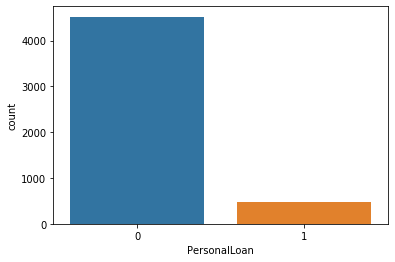

In [6]:
# 시각화
## countplot 은 원하는 column 하나를 넣어주면 예쁘게 시각화해줌

sns.countplot(bank['PersonalLoan'])

## train / test split

x_data는 personal loan 을 뺀 나머지임
중간에 껴있는 column 이니 어떻게 처리?

In [7]:
bank.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP.Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'PersonalLoan', 'SecuritiesAccount',
       'CDAccount', 'Online', 'CreditCard'],
      dtype='object')

In [8]:
lst = bank.columns.tolist()
lst.remove('PersonalLoan')

## list 에서만 쓸수 있어서 리스트로 바꿔주고 remove 해줌

lst

['ID',
 'Age',
 'Experience',
 'Income',
 'ZIP.Code',
 'Family',
 'CCAvg',
 'Education',
 'Mortgage',
 'SecuritiesAccount',
 'CDAccount',
 'Online',
 'CreditCard']

In [9]:
x_data = bank[lst]

## 독립변수 x_data

y_data = bank['PersonalLoan']

## 종속변수 y 는 우리가 구하고자 하는 personal Loan

In [21]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, 
                                                   test_size = 0.3,
                                                   random_state = 777)

## 의사결정나무 모델 생성
### sklearn update
### https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

이 사이트 들어가서 parameters 확인하기

In [22]:
import sklearn

sklearn.__version__

## upgrade 하니 default 값은 안뜸 ㅜㅜ 
## 그래서 사이트 들어가서 어떤게 default 인지 확인해야함.

'0.23.2'

In [23]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

# class_weight : class별 가중치
# criterion : 가지치기 기준
# max_depth : 최대 깊이
# max_features : 사용하는 최대 column 개수(auto ,sqrt, log2)
# max_leaf_node : 최대 leaf 노드의 개수
# min_samples_split : node를 split할 때 중간 노드에 최소 있어야하는 데이터의 개수
# min_samples_leaf : node를 split할 때 리프 노드에 최소 있어야하는 데이터의 개수
# ccp_alpha : 과적합 방지를 위한 손실함수 parameter



model = DecisionTreeClassifier(ccp_alpha=0.01)
model

DecisionTreeClassifier(ccp_alpha=0.01)

In [24]:
# 모델 학습

model.fit(X_train, y_train)

## decision tree 는 column 하나에 대해서 분류하기 때문에 
## 굳이 정규화 안해도 됨. 
## scaling 안해도 됨

DecisionTreeClassifier(ccp_alpha=0.01)

In [25]:
# 예측
y_pred = model.predict(X_test)

In [26]:
## 매트릭스는 성능 평가할 때 잘 쓰임
from sklearn.metrics import accuracy_score, confusion_matrix

accuracy_score(y_test, y_pred)
confusion_matrix(y_test, y_pred)

array([[1342,    6],
       [  25,  127]], dtype=int64)

In [28]:
## 실제 1 중에 예측을 어떻게 했는지가 중요
## 0/152 -> 0.. 예측 하나도 못한것임 정말 못한것임
## 정확도가 중요한게 아니라 실제.. 1 152 0 이게 높아야함..

#ccp_alpha 를 0.01로 줘볼게요
## 대출 하는사람이 중요. 대출안하는 사람보다. 따라서 여길 포기하더라도 이쪽에 집중하는 것이 더 좋음
#(0,1 보다 0.01 이 더 좋음)